In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [19]:
temp=np.array([14.1, 16.7, 19.7, 25.2, 25.1, 18.8, 11.7, 10.2, 9.0, 9.1, 10.5])
humidity=np.array([44.3, 50.4, 46.8, 33.7, 37.4, 54.2, 68.2, 69.0, 45.0, 51.3, 20.7])
temp

array([14.1, 16.7, 19.7, 25.2, 25.1, 18.8, 11.7, 10.2,  9. ,  9.1, 10.5])

In [20]:


t0=53.95
t1=-0.56

a=t0+t1*temp
a
    
# print(predicted_values)

array([46.054, 44.598, 42.918, 39.838, 39.894, 43.422, 47.398, 48.238,
       48.91 , 48.854, 48.07 ])

In [21]:
X=pd.DataFrame(temp)
Y=pd.DataFrame(humidity)

print(type(X))
r=LinearRegression()
r.fit(X, Y)
print('R-score of the model:', r.score(X,Y))
#the rscore value is very low because the model predicted the value of theta1 to be 0;
print(X)


<class 'pandas.core.frame.DataFrame'>
R-score of the model: 0.0998182206791014
       0
0   14.1
1   16.7
2   19.7
3   25.2
4   25.1
5   18.8
6   11.7
7   10.2
8    9.0
9    9.1
10  10.5


In [22]:
theta_0=r.intercept_[0]  
theta_1=r.coef_[0][0]  
print('theta_0 generated by model:',theta_0)
print('theta_1 generated by model:', theta_1)
y= r.predict(X)
print(y.flatten())


theta_0 generated by model: 58.699188015653185
theta_1 generated by model: -0.7330456682668136
[48.36324409 46.45732536 44.25818835 40.22643718 40.29974174 44.91792945
 50.1225537  51.2221222  52.101777   52.02847243 51.0022085 ]


In [23]:
diff=[]
actual=humidity.flatten()
for i in range(len(y)):
    a=round(abs(float(y[i]-actual[i])), 3)
    diff.append(a)
# print(diff)
# print('predicted value for humidity when temperature is 12.6:',y)
print('Mean difference between actual and predicted values = ', round(sum(diff)/11, 3))

Mean difference between actual and predicted values =  9.386


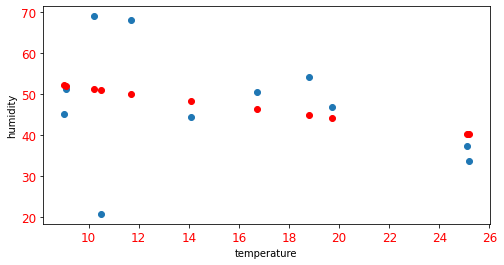

In [24]:
#Visualizing Data

plt.figure(figsize=(8,4))
plt.scatter(temp, humidity) #alpha sets transparency of dots
plt.xticks(color='red',fontsize=12)
plt.yticks(color='red',fontsize=12)
plt.xlabel('temperature')
plt.ylabel('humidity')
# plt.plot(X, y,color='red')
plt.scatter(X, y,color='red')

## methods to improve R-score of the model

## cost of the model

In [25]:
#The cost function - MSE
def mse(theta_0,theta_1):
    total=0
    for j in range(len(temp)):
        total+=(humidity[j]-theta_0-theta_1*temp[j])**2
    return total/(2*len(temp))

In [26]:
#using model's predicted theta values
print(mse(theta_0, theta_1))

#using given theta values
print(mse(53.95, -0.56))

81.25963240486266
83.91098963636362
